#Rahul Deshmukh: 
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [1]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import pickle
import time
from google.colab import drive
drive.mount('/content/gdrive')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Part 0: Importing and normalizing data

In [2]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4423680/4422102 [==============================] - 0s 0us/step


#Part 1: Plotting cross entropy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


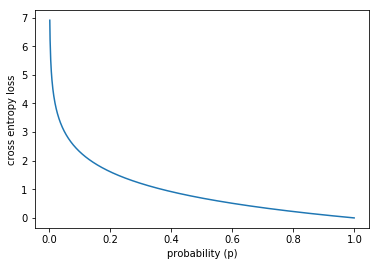

In [0]:
#Show cross-entropy loss function
def cross_entropy_loss(p,y):
  loss = - (y*np.log(p) + (1-y)*np.log(1-p))
  return loss

#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
p = np.linspace(0,1,1000)
true_label=1
loss = [cross_entropy_loss(ip,true_label) for ip in p]
plt.plot(p,loss)
plt.xlabel('probability (p)')
plt.ylabel('cross entropy loss')
plt.show()


Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: The negative log-likelihood of p has a high value of the loss function when the value of p is small, ie the loss function penalizes more for a wrong prediction. When p is large, the loss function has a small value, ie a correct prediction needs no further correction.

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: The negative log-likelihood function is a good objective function for minimization specifically for outputs which can be interpreted as a conditional probability distribution, $p_{model}(y |x)$, as it removes the burden of designing cost functions for different models. The cost funcion simply becomes: $-log(p_{model}(y |x))$.
  
  Also, the negative log-likelihood helps in avoiding saturation, specially for the output units which involve the exponential function where function value saturates for large negative values, by undoing the exponential function using the log function.




#Part 2: Overfit CNN

In [0]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    # first layer: convlayer
    model.add(Conv2D(filters=256,
                   kernel_size=(3,3),
                   input_shape=(28,28,1),
                   activation="relu"))
  
    #second layer: 2x2 max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2),
                         strides=None,
                         padding="valid",
                         data_format=None))
  
    #third layer: conv layer 128 features with 3x3 filters
    model.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                    activation="relu"))

    #4th layer: 2x2 max pool
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding="valid",
                          data_format=None,))

    #5th layer: flatten 
    model.add(Flatten())

    # 6th layer: dense with 100 perceps
    model.add(Dense(units=100,
                   activation="relu",
                   kernel_initializer="normal"))

    # 7th layer: dense with 100 perceps
    model.add(Dense(units=100,
                   activation="relu",
                   kernel_initializer="normal"))

    # out layer: 10 perceps
    model.add(Dense(units=10,
                   activation="softmax"))
  
    return model

In [4]:
#Create instance of CNN model graph
cnn_overfit_model = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
cnn_overfit_model.compile(loss='categorical_crossentropy',
                   optimizer='RMSprop',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_overfit_mdata = cnn_overfit_model.fit(data_train,labels_train,
                                         validation_data=(data_test,labels_test),
                                         epochs=200,
                                         batch_size=1024,
                                         shuffle=True,
                                         verbose=1)

cnn_overfit_model.save_weights('cnn_overfit_wts.h5')
!cp cnn_overfit_wts.h5 /content/gdrive/My\ Drive/ML2/Project-1/

with open('cnn_overfit_history.pkl', 'wb') as f:  
  pickle.dump(cnn_overfit_mdata.history, f)

!cp cnn_overfit_history.pkl /content/gdrive/My\ Drive/ML2/Project-1/








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 330us/step - loss: 1.0255 - acc: 0.6176 - val_loss: 0.7560 - val_acc: 0.6870
Epoch 2/200
60000/60000 [==============================] - 11s 184us/step - loss: 0.5734 - acc: 0.7817 - val_loss: 0.5419 - val_acc: 0.7973
Epoch 3/200
60000/60000 [==============================] - 11s 184us/step - loss: 0.4631 - acc: 0.8274 - val_loss: 0.4874 - val_acc: 0.8181
Epoch 4/200
60000/60000 [==============================] - 11s 185us/step - loss: 0.4003 - acc: 0.8515 - val_loss: 0.4201 - val_acc: 0.8409
Epoch 5/200
60000/60000 [==============================] - 11s 186us/step - loss: 0.3595 - acc: 0.8655 - val_loss: 0.3479 - val_acc: 0.8738
Epoch 6/200
60000/60000 [==============================] - 11s 186us/step - loss: 0.3262 - acc: 0.8794 - val_loss: 0.3465 - val_acc: 0.8724
Epoch 7/2

In [9]:
#!cp /content/gdrive/My\ Drive/ML2/Project-1/cnn_overfit_wts.h5 ./
#!cp  /content/gdrive/My\ Drive/ML2/Project-1/cnn_overfit_history.pkl ./

#with open('cnn_overfit_history.pkl', 'rb') as f:  
#  cnn_overfit_mdata_history = pickle.load(f)

##Create instance of CNN model graph
#cnn_overfit_model = CNN_overfit()

##Compile model using an appropriate loss and optimizer algorithm
#cnn_overfit_model.compile(loss='categorical_crossentropy',
#                   optimizer='RMSprop',
#                   metrics=['accuracy'])
#cnn_overfit_model.load_weights('cnn_overfit_wts.h5')  
#evaluating the model
score=cnn_overfit_model.evaluate(data_test,labels_test)

#Print accuracy of model on testing set after training 
print("Accuracy: %0.2f%%"%(score[1]*100))

10000/10000 [==============================] - 2s 165us/step
Accuracy: 90.98%


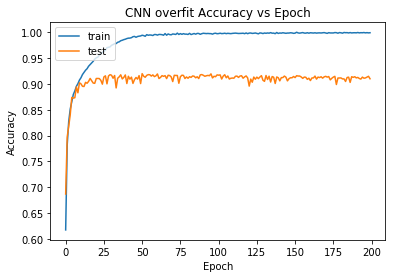

In [10]:
#Plot accuracy vs epoch
plt.plot(cnn_overfit_mdata_history['acc'])
plt.plot(cnn_overfit_mdata_history['val_acc'])
plt.title('CNN overfit Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

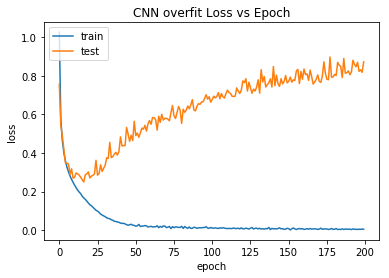

loss of training set:0.00
loss of testing set:0.87


In [11]:
#Plot loss vs epoch
plt.plot(cnn_overfit_mdata_history['loss'])
plt.plot(cnn_overfit_mdata_history['val_loss'])
plt.title('CNN overfit Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# print loss 
print('loss of training set:%0.2f'%(cnn_overfit_mdata_history['loss'][-1]))
print('loss of testing set:%0.2f'%(cnn_overfit_mdata_history['val_loss'][-1]))

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: The loss of the training set goes to __0.00__

2.   What does the loss of the testing set go to? 

  ANS: The loss of testing set goes to __0.87__ ie not at all generalizable.
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: The model performs very well for the training data and poorly for the testing data, this is because the model is overfitted to the training data. 

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: Since the model learnt is overfitted to the training set, the accuracy for of the model for the training set is high. However, it is not a generalizable model as it cannot perform well over unseen data, ie testing data. To avoid overfitting we can simplify the model by __dropping a hidden layer__ or we can use __dropout layers__ which randomly drops connections between layers.

#Part 3: Dropout on input layer

In [0]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()
    
    # dropout of 30% for input layer
    model.add(Dropout(0.3))
    
    # first layer: convlayer
    model.add(Conv2D(filters=256,
                   kernel_size=(3,3),
                   input_shape=(28,28,1),
                   activation="relu"))
    
  
    #second layer: 2x2 max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2),
                         strides=None,
                         padding="valid",
                         data_format=None))
  
    #third layer: conv layer 128 features with 3x3 filters
    model.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                     activation="relu"))

    #4th layer: 2x2 max pool
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding="valid",
                          data_format=None,))

    #5th layer: flatten 
    model.add(Flatten())

    # 6th layer: dense with 100 perceps
    model.add(Dense(units=100,
                   activation="relu",
                   kernel_initializer="normal"))

    # 7th layer: dense with 100 perceps
    model.add(Dense(units=100,
                   activation="relu",
                   kernel_initializer="normal"))

    # out layer: 10 perceps
    model.add(Dense(units=10,
                   activation="softmax"))
    
    return model

In [38]:
#Create instance of CNN model graph
cnn_dropout_in_model = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
cnn_dropout_in_model.compile(loss='categorical_crossentropy',
                   optimizer='RMSprop',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_dropout_in_mdata = cnn_dropout_in_model.fit(data_train,labels_train,
                                         validation_data=(data_test,labels_test),
                                         epochs=200,
                                         batch_size=1024,
                                         shuffle=True)

cnn_dropout_in_model.save_weights('cnn_dr_in_wts.h5')
!cp cnn_dr_in_wts.h5 /content/gdrive/My\ Drive/ML2/Project-1/

with open('cnn_dr_in_history.pkl', 'wb') as f:  
  pickle.dump(cnn_dropout_in_mdata.history, f)

!cp cnn_dr_in_history.pkl /content/gdrive/My\ Drive/ML2/Project-1/

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 197us/step - loss: 1.1522 - acc: 0.5692 - val_loss: 0.8688 - val_acc: 0.6575
Epoch 2/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.6516 - acc: 0.7476 - val_loss: 0.6584 - val_acc: 0.7445
Epoch 3/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.5432 - acc: 0.7924 - val_loss: 0.6088 - val_acc: 0.7839
Epoch 4/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.4846 - acc: 0.8167 - val_loss: 0.5113 - val_acc: 0.8122
Epoch 5/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.4464 - acc: 0.8326 - val_loss: 0.4489 - val_acc: 0.8376
Epoch 6/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.4168 - acc: 0.8428 - val_loss: 0.4193 - val_acc: 0.8524
Epoch 7/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.3897 - acc: 0.8518 - val_l

In [39]:
#!cp /content/gdrive/My\ Drive/ML2/Project-1/cnn_dr_in_wts.h5 ./
#!cp  /content/gdrive/My\ Drive/ML2/Project-1/cnn_dr_in_history.pkl ./

#with open('cnn_dr_in_history.pkl', 'rb') as f:  
#  cnn_dropout_in_mdata_history = pickle.load(f)
#  
##Create instance of CNN model graph
#cnn_dropout_in_model = CNN_dropout_in()

##Compile model using an appropriate loss and optimizer algorithm
#cnn_dropout_in_model.compile(loss='categorical_crossentropy',
#                   optimizer='RMSprop',
#                   metrics=['accuracy'])

#cnn_dropout_in_model.load_weights('cnn_dr_in_wts.h5')

#evaluating the model
dropout_in_score=cnn_dropout_in_model.evaluate(data_test,labels_test)

#Print accuracy of model on testing set after training 
print("Accuracy: %0.2f%%"%(dropout_in_score[1]*100))

10000/10000 [==============================] - 1s 146us/step
Accuracy: 87.87%


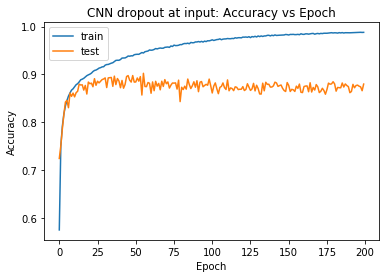

In [40]:
#Plot accuracy vs epoch
plt.plot(cnn_dropout_in_mdata_history['acc'])
plt.plot(cnn_dropout_in_mdata_history['val_acc'])
plt.title('CNN dropout at input: Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

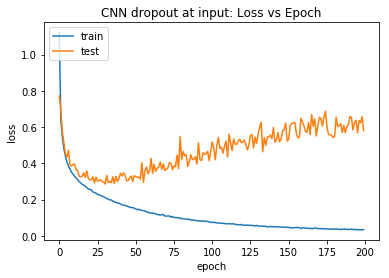

loss of training set:0.03
loss of testing set:0.58


In [17]:
#Plot loss vs epoch
plt.plot(cnn_dropout_in_mdata_history['loss'])
plt.plot(cnn_dropout_in_mdata_history['val_loss'])
plt.title('CNN dropout at input: Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# print loss 
print('loss of training set:%0.2f'%(cnn_dropout_in_mdata_history['loss'][-1]))
print('loss of testing set:%0.2f'%(cnn_dropout_in_mdata_history['val_loss'][-1]))

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: The loss of the training set goes to __0.03__
  
2.   What does the loss of the testing set go to? 

  ANS: The loss of the testing set goes to __0.58__

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: The loss for training and testing set are so different regardless of using dropout layer because we have learnt a overfitted model which fits the training data exactly and thus performs poorly for testing data (which is different from training data).
  
  Also even with the use of dropout layer at the input, the losses are still different this indicates that the learned model still overfits the training data and the source of overfitting comes from hidden layers. 

#Part 4: Dropout on Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()     
    
    # first layer: convlayer
    model.add(Conv2D(filters=256,
                   kernel_size=(3,3),
                   input_shape=(28,28,1),
                   activation="relu"))
    model.add(Dropout(0.3))
  
    #second layer: 2x2 max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2),
                         strides=None,
                         padding="valid",
                         data_format=None))
  
    #third layer: conv layer 128 features with 3x3 filters
    model.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                     activation="relu"))
    model.add(Dropout(0.3))

    #4th layer: 2x2 max pool
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding="valid",
                          data_format=None,))

    #5th layer: flatten 
    model.add(Flatten())

    # 6th layer: dense with 100 perceps
    model.add(Dense(units=100,
                   activation="relu",
                   kernel_initializer="normal"))

    # 7th layer: dense with 100 perceps
    model.add(Dense(units=100,
                   activation="relu",
                   kernel_initializer="normal"))

    # out layer: 10 perceps
    model.add(Dense(units=10,
                   activation="softmax"))
    
    return model

In [5]:
#Create instance of CNN model graph
cnn_dropout_hid_model = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
cnn_dropout_hid_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_dropout_hid_mdata = cnn_dropout_hid_model.fit(data_train,labels_train,
                                         validation_data=(data_test,labels_test),
                                         epochs=200,
                                         batch_size=1024,
                                         shuffle=True)

cnn_dropout_hid_model.save_weights('cnn_dr_hid_wts.h5')
!cp cnn_dr_hid_wts.h5 /content/gdrive/My\ Drive/ML2/Project-1/

with open('cnn_dr_hid_history.pkl', 'wb') as f:  
  pickle.dump(cnn_dropout_hid_mdata.history, f)

!cp cnn_dr_hid_history.pkl /content/gdrive/My\ Drive/ML2/Project-1/

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 332us/step - loss: 0.8941 - acc: 0.6749 - val_loss: 0.6443 - val_acc: 0.7904
Epoch 2/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.4680 - acc: 0.8276 - val_loss: 0.5178 - val_acc: 0.8488
Epoch 3/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.3989 - acc: 0.8546 - val_loss: 0.4656 - val_acc: 0.8591
Epoch 4/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.3585 - acc: 0.8716 - val_loss: 0.4216 - val_acc: 0.8682
Epoch 5/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.3298 - acc: 0.8806 - val_loss: 0.4111 - val_acc: 0.8792
Epoch 6/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.3120 - acc: 0.8859 - val_loss: 0.3944 - val_acc: 0.8702
Epoch 7/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.2931 - acc: 0.8936 - val_l

In [6]:
#!cp /content/gdrive/My\ Drive/ML2/Project-1/cnn_dr_hid_wts.h5 ./
#!cp  /content/gdrive/My\ Drive/ML2/Project-1/cnn_dr_hid_history.pkl ./

#with open('cnn_dr_hid_history.pkl', 'rb') as f:  
#  cnn_dropout_hid_mdata_history = pickle.load(f)


##Create instance of CNN model graph
#cnn_dropout_hid_model = CNN_dropout_hidden()

##Compile model using an appropriate loss and optimizer algorithm
#cnn_dropout_hid_model.compile(loss='categorical_crossentropy',
#                   optimizer='RMSprop',
#                   metrics=['accuracy'])

#cnn_dropout_hid_model.load_weights('cnn_dr_hid_wts.h5')

#evaluating the model
dropout_hid_score=cnn_dropout_hid_model.evaluate(data_test,labels_test)

#Print accuracy of model on testing set after training 
print("Accuracy: %0.2f%%"%(dropout_hid_score[1]*100))

10000/10000 [==============================] - 2s 168us/step
Accuracy: 92.02%


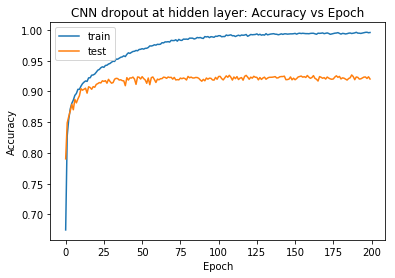

In [7]:
#Plot accuracy vs epoch
plt.plot(cnn_dropout_hid_mdata.history['acc'])
plt.plot(cnn_dropout_hid_mdata.history['val_acc'])
plt.title('CNN dropout at hidden layer: Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

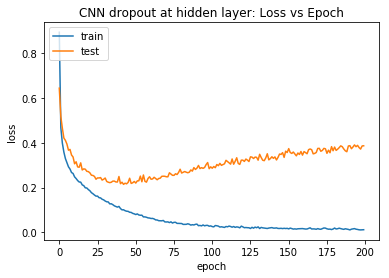

loss of training set:0.01
loss of testing set:0.39


In [9]:
#Plot loss vs epoch
plt.plot(cnn_dropout_hid_mdata.history['loss'])
plt.plot(cnn_dropout_hid_mdata.history['val_loss'])
plt.title('CNN dropout at hidden layer: Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# print loss 
print('loss of training set:%0.2f'%(cnn_dropout_hid_mdata.history['loss'][-1]))
print('loss of testing set:%0.2f'%(cnn_dropout_hid_mdata.history['val_loss'][-1]))

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: The loss of training set goes to __0.01__.
  
2.   What does the loss of the testing set go to? 

  ANS: The loss of testing set goes to __0.39__

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: Using dropout in hidden layers was more affective because the hidden layers decide the final form of the non-linear transform of the input features. If the hidden layers have high complexity then it can result in overfitting, therefore having dropout layers just after hidden layers helps in avoiding overfitting. Whereas, for Part 3 we had dropout layer just after the input layer which only helps in avoiding overfitting by reducing the number of training samples but does not affect the non-linear transform.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The model accuracy for training and testing set is __99.6%__ and __92.0%__ respectively. Yes, based on accuracy we can say that the model is a good fit for the data.

#Part 5: Dropout on Input and Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_both():
    model = Sequential()     
    
    model.add(Dropout(0.3))
    
    # first layer: convlayer
    model.add(Conv2D(filters=256,
                   kernel_size=(3,3),
                   input_shape=(28,28,1),
                   activation="relu"))
    model.add(Dropout(0.3))
  
    #second layer: 2x2 max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2),
                         strides=None,
                         padding="valid",
                         data_format=None))
  
    #third layer: conv layer 128 features with 3x3 filterss
    model.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                    activation="relu"))
    model.add(Dropout(0.3))

    #4th layer: 2x2 max pool
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding="valid",
                          data_format=None))

    #5th layer: flatten 
    model.add(Flatten())

    # 6th layer: dense with 100 perceps
    model.add(Dense(units=100,
                   activation="relu",
                   kernel_initializer="normal"))

    # 7th layer: dense with 100 perceps
    model.add(Dense(units=100,
                   activation="relu",
                   kernel_initializer="normal"))

    # out layer: 10 perceps
    model.add(Dense(units=10,
                   activation="softmax"))
    
    return model

In [11]:
#Create instance of CNN model graph
cnn_dropout_both_model = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
cnn_dropout_both_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_dropout_both_mdata = cnn_dropout_both_model.fit(data_train,labels_train,
                                         validation_data=(data_test,labels_test),
                                         epochs=200,
                                         batch_size=1024,
                                         shuffle=True,
                                         verbose=1)

cnn_dropout_both_model.save_weights('cnn_dr_both_wts.h5')
!cp cnn_dr_both_wts.h5 /content/gdrive/My\ Drive/ML2/Project-1/

with open('cnn_dr_both_history.pkl', 'wb') as f:  
  pickle.dump(cnn_dropout_both_mdata.history, f)

!cp cnn_dr_both_history.pkl /content/gdrive/My\ Drive/ML2/Project-1/

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 334us/step - loss: 0.9920 - acc: 0.6411 - val_loss: 0.8729 - val_acc: 0.7607
Epoch 2/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.5635 - acc: 0.7882 - val_loss: 0.7360 - val_acc: 0.8078
Epoch 3/200
60000/60000 [==============================] - 19s 322us/step - loss: 0.4813 - acc: 0.8210 - val_loss: 0.6593 - val_acc: 0.8226
Epoch 4/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.4364 - acc: 0.8404 - val_loss: 0.6244 - val_acc: 0.8279
Epoch 5/200
60000/60000 [==============================] - 19s 322us/step - loss: 0.4141 - acc: 0.8465 - val_loss: 0.5971 - val_acc: 0.8471
Epoch 6/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.3912 - acc: 0.8553 - val_loss: 0.5773 - val_acc: 0.8504
Epoch 7/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.3819 - acc: 0.8577 - val_l

In [12]:
#!cp /content/gdrive/My\ Drive/ML2/Project-1/cnn_dr_both_wts.h5 ./
#!cp  /content/gdrive/My\ Drive/ML2/Project-1/cnn_dr_both_history.pkl ./

#with open('cnn_both_history.pkl', 'rb') as f:  
#  cnn_dropout_both_data_history = pickle.load(f)
#  
##Create instance of CNN model graph
#cnn_dropout_both_model = CNN_dropout_both()

##Compile model using an appropriate loss and optimizer algorithm
#cnn_dropout_both_model.compile(loss='categorical_crossentropy',
#                   optimizer='RMSprop',
#                   metrics=['accuracy'])

#cnn_dropout_both_model.load_weights('cnn_dr_both_wts.h5')

#evaluating the model
dropout_both_score=cnn_dropout_both_model.evaluate(data_test,labels_test)

#Print accuracy of model on testing set after training 
print("Accuracy: %0.2f%%"%(dropout_both_score[1]*100))

10000/10000 [==============================] - 2s 173us/step
Accuracy: 86.16%


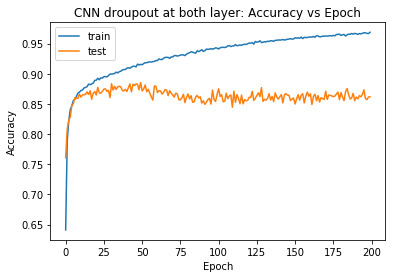

In [13]:
#Plot accuracy vs epoch
plt.plot(cnn_dropout_both_mdata.history['acc'])
plt.plot(cnn_dropout_both_mdata.history['val_acc'])
plt.title('CNN droupout at both layer: Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

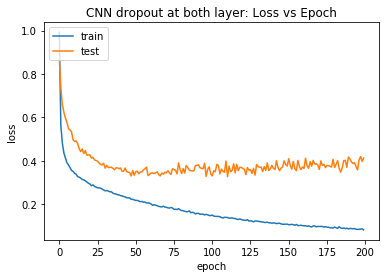

loss of training set:0.08
loss of testing set:0.41


In [14]:
#Plot loss vs epoch
plt.plot(cnn_dropout_both_mdata.history['loss'])
plt.plot(cnn_dropout_both_mdata.history['val_loss'])
plt.title('CNN dropout at both layer: Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# print loss 
print('loss of training set:%0.2f'%(cnn_dropout_both_mdata.history['loss'][-1]))
print('loss of testing set:%0.2f'%(cnn_dropout_both_mdata.history['val_loss'][-1]))

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: The loss of training set goes to __0.08__
  
2.   What does the loss of the testing set go to? 

  ANS: The loss of testing set goes to __0.41__
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: The Accuracy for training data was __96.9%__ and for testing data was __86.2%__.
  
4.   Compare the plots obtained in this part to the plots from Part 4. Did using dropout in the input layer, in addition to using dropout in the hidden layers as in Part 4, significantly increase the robustness of your model? 

  ANS: The addition of dropout layer in the input layer for Part-5 has reduced the accuracy of prediction for testing data when compared to model in Part-4. Therefore, this model is less robust than the model in Part-4.

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [0]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
#Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
#snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
with open("RML2016.10b.dat",'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    Xd = u.load()
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])

X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy=list(yy)
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2019-09-17 14:30:01--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  12.6MB/s    in 1m 56s  

2019-09-17 14:31:57 (10.3 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [0]:
#Create and train model architecture
def cldnn():
    model = Sequential()     
      
    # first layer: convlayer
    model.add(Conv2D(filters=256,kernel_size=(1,3),activation="relu",
                     input_shape=(2,128,1)))
    model.add(Dropout(0.2))
    
    #2nd layer
    model.add(Conv2D(filters=256,kernel_size=(2,3),activation="relu"))
    
    # 3rd layer
    model.add(Conv2D(filters=80,kernel_size=(1,3),activation="relu"))
    model.add(Dropout(0.2))
    
    #4th layer
    model.add(Conv2D(filters=80,kernel_size=(1,3),activation="relu"))
    #print(model.summary())
    #reshape
    model.add(Reshape((16,600)))
    
    #5th layer: flatten 
    model.add(LSTM(50))

    # 6th layer: dense with 128 perceps
    model.add(Dense(units=128,activation="relu",kernel_initializer="normal"))

    # out layer: 10 perceps
    model.add(Dense(units=10,activation="softmax"))
    
    return model

#Create instance of CNN model graph
cldnn_model = cldnn()

#start_time= time.time()
#Compile model using an appropriate loss and optimizer algorithm
cldnn_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
cldnn_mdata = cldnn_model.fit(X_train,Y_train,
                              validation_data=(X_test,Y_test),
                              epochs=100,
                              batch_size=1000,
                              shuffle=True,
                              verbose=1)

cldnn_model.save_weights('final_wts_relu.h5')
!cp final_wts_relu.h5 /content/gdrive/My\ Drive/ML2/Project-1/

with open('reluHistory', 'wb') as f:  
  pickle.dump(cldnn_mdata.history, f)

!cp reluHistory /content/gdrive/My\ Drive/ML2/Project-1/

print('#----------------------------#')

In [0]:
!cp /content/gdrive/My\ Drive/ML2/Project-1/final_wts_relu.h5 ./
!cp  /content/gdrive/My\ Drive/ML2/Project-1/reluHistory ./

with open('reluHistory', 'rb') as f:  
  cldnn_mdata_history = pickle.load(f)

#Create instance of CNN model graph
cldnn_model = cldnn()

##Compile model using an appropriate loss and optimizer algorithm
cldnn_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])
cldnn_model.load_weights('final_wts_relu.h5')

##evaluating the model
cldnn_score = cldnn_model.evaluate(X_test,Y_test)

##Print accuracy of model on testing set after training 
print("Accuracy: %0.2f%%"%(cldnn_score[1]*100))

108000/108000 [==============================] - 64s 596us/step
Accuracy: 92.15%


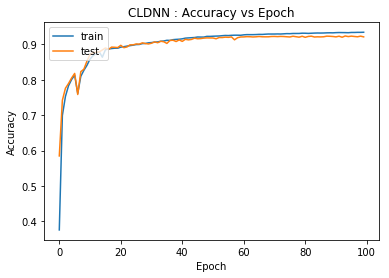

In [0]:
#Plot accuracy vs epoch
plt.plot(cldnn_mdata_history['acc'])
plt.plot(cldnn_mdata_history['val_acc'])
plt.title('CLDNN : Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

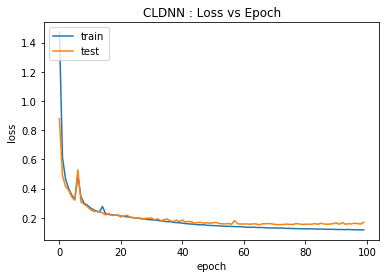

loss of training set:0.12
loss of testing set:0.17


In [0]:
#Plot loss vs epoch
plt.plot(cldnn_mdata_history['loss'])
plt.plot(cldnn_mdata_history['val_loss'])
plt.title('CLDNN : Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# print loss 
print('loss of training set:%0.2f'%(cldnn_mdata_history['loss'][-1]))
print('loss of testing set:%0.2f'%(cldnn_mdata_history['val_loss'][-1]))

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Since both loss and accuracy for training and testing data converge to early the same values and the accuracy for testing data is __92.15%__. This means that the model learnt is a good fit for the data.

2.   Give two ways to improve the robustness of the model.

  ANS: To further improve the robustness of the model we can add a dropout layer just after the input layer and we can also add another dropout layer after the 4th which was the convolution layer.